# Format SPOUT family knot core data to a more suitable format

1. Parse CSVs (Excel sheets) to one *+ take only sequences where the knot core is present*
2. Join with test, train data separately (using pandas) *+ get rid of 0 class*
3. Export to one CSV while preserving the family (new column)

In [1]:
INPUT_PATHS = ['/home/jovyan/data/proteins/knot_cores/IPR019230.csv', 
               '/home/jovyan/data/proteins/knot_cores/IPR022724.csv',
               '/home/jovyan/data/proteins/knot_cores/IPR018665.csv',
               '/home/jovyan/data/proteins/knot_cores/IPR007501.csv',
               '/home/jovyan/data/proteins/knot_cores/IPR025849.csv'
              ]
HF_DATASET = 'EvaKlimentova/knots_SPOUTxRossmann'

In [2]:
import pandas as pd

dfs = []
for csv_path in INPUT_PATHS:
    print(f'Reading {csv_path}')
    df = pd.read_csv(csv_path)
    df['family'] = csv_path.split('/')[-1].split('.')[0]  # get family from file name
    dfs.append(df)
    
df_cores = pd.concat(dfs)
df_cores = df_cores.rename(columns={'knot core left': 'knot_start', 'knot core right': 'knot_end'})
df_cores

Reading /home/jovyan/data/proteins/knot_cores/IPR019230.csv
Reading /home/jovyan/data/proteins/knot_cores/IPR022724.csv
Reading /home/jovyan/data/proteins/knot_cores/IPR018665.csv
Reading /home/jovyan/data/proteins/knot_cores/IPR007501.csv
Reading /home/jovyan/data/proteins/knot_cores/IPR025849.csv


,id,knot_type,knot_start,knot_end,seq,family
0,A0A017H5Z9,NaN,NaN,NaN,MRKQIYLALVHYPVYNKRREVVCTSVTNFDIHDISRTCSTYDIKGY...,IPR019230
1,A0A017T8Y3,NaN,NaN,NaN,MTRIALALVHYPVLDRAGAHVTTAITNLDLHDMARSARTYGVERLF...,IPR019230
2,A0A075KH71,NaN,NaN,NaN,MALPIYLGLVHHPIYNKNNEIITTAITNFDIHDIARTSRTYDIKRY...,IPR019230
3,A0A081BUF1,3_1',97,152,MYDKHRKIVATSITNYDIHDISRLARTYDLGGYYMVTPLISQQELC...,IPR019230
4,A0A095WIB9,3_1',110,157,MRNKVYLSLVHYPVYNRNRDVVCTSVTNFDIHDISRSCGTYEIKGY...,IPR019230
...,...,...,...,...,...,...
207,N6W058,3_1',269,316,MKFIIKTERGLENIVVNHLKDLVENFNYITSPDGYQGIVIVEAEED...,IPR025849
208,Q9V2I9,3_1',271,318,MKFIVKTQMDMEAVAGNYIKEVLPEAKVTIAPGGYPGLIIVESEDE...,IPR025849
209,Q9YCV6,3_1',266,313,MKTSLGFERIAAARIEEEAPHLRARPIPRGFKGLVLVYGCRDPEAD...,IPR025849
210,W0I2L3,3_1',268,315,MKFLIKTQRGMEAVAGNYIKETLEDAKVWISPQGYSGLILVETDDE...,IPR025849


## Clean the data:

In [3]:
df_cores = df_cores[df_cores['knot_start'].notna()]  # remove NaN values
df_cores = df_cores[df_cores['knot_start'] != 'None']  # remove 'None' values 
df_cores

,id,knot_type,knot_start,knot_end,seq,family
3,A0A081BUF1,3_1',97,152,MYDKHRKIVATSITNYDIHDISRLARTYDLGGYYMVTPLISQQELC...,IPR019230
4,A0A095WIB9,3_1',110,157,MRNKVYLSLVHYPVYNRNRDVVCTSVTNFDIHDISRSCGTYEIKGY...,IPR019230
5,A0A096C003,3_1',109,156,MANLYIGLVHYPIMNKHGEIITTAITNYDIHDIARAAITYDVSNYF...,IPR019230
6,A0A0A2TM68,3_1',109,157,MADIYLALIHAPVYNKNMKTVATSITNLDLHDIARCSTTYGLKRYF...,IPR019230
8,A0A0A8WV19,3_1',116,164,MCIETVPAARVAVALLHHPVYDKHRQVVTTAVTNLDLHDIARAAKT...,IPR019230
...,...,...,...,...,...,...
207,N6W058,3_1',269,316,MKFIIKTERGLENIVVNHLKDLVENFNYITSPDGYQGIVIVEAEED...,IPR025849
208,Q9V2I9,3_1',271,318,MKFIVKTQMDMEAVAGNYIKEVLPEAKVTIAPGGYPGLIIVESEDE...,IPR025849
209,Q9YCV6,3_1',266,313,MKTSLGFERIAAARIEEEAPHLRARPIPRGFKGLVLVYGCRDPEAD...,IPR025849
210,W0I2L3,3_1',268,315,MKFLIKTQRGMEAVAGNYIKETLEDAKVWISPQGYSGLILVETDDE...,IPR025849


## Join with train, test data from HF:

In [4]:
from datasets import load_dataset

dataset = load_dataset(HF_DATASET)
dataset

Using custom data configuration EvaKlimentova--knots_SPOUTxRossmann-02ac96abc01f9344
Reusing dataset csv (/home/jovyan/.cache/huggingface/datasets/EvaKlimentova___csv/EvaKlimentova--knots_SPOUTxRossmann-02ac96abc01f9344/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a)


  0%|          | 0/2 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['seq', 'label'],
        num_rows: 91633
    })
    test: Dataset({
        features: ['seq', 'label'],
        num_rows: 22909
    })
})

In [5]:
df_train = dataset['train'].to_pandas()
df_train

,seq,label
0,MIPKYPKVPELSDKQIDEITKVVFCNDIILNKADLLFVFGSTDPGA...,0.0
1,MAYSGDKNTYKGKSNNKGSRSKNPSRQHQHTDFQKSVEYYSESELE...,1.0
2,MMKIDVLTLFPEMFEGVFGHSILKKAEDQHAVQYNVVNFRSYADNK...,1.0
3,MSKSLGNVINPLDLAKEYGTEAVRYFLLRHVHPFEDSDVTPENIKE...,0.0
4,MKLHILAVGHKMPDWIATGFDEYAKRMPPELRIELREIKPEQRSSG...,1.0
...,...,...
91628,MAGSNHTPIKPVHRARLDNIAVVLHRPHFPENIGAVARACKNMGIF...,1.0
91629,MTDSVPIPEIPPTATAPDSAIDPAPQITQAPEDSPKRMGVDGEQNP...,1.0
91630,MDGSKIKRASKKLKRKFSLADKLDKKSRKKLKKQKSDASIAGSITD...,1.0
91631,QASMGSVFRMPVFYQDLLPILTQAKAEKVPIHAALLEGKNVYKTRL...,1.0


In [6]:
df_test = dataset['test'].to_pandas()
df_test

,seq,label
0,MKQKLLVSFSGGQTSAYMTKWCIDNLSEKYDIVVVFANTGKEREET...,0.0
1,MTEQPTPPAFNIVHIADAEDTRLDDFRDLNHSDNRPDLPGGKGLVI...,1.0
2,MSDQTSSSGPVTIVVEHLDPELGAWSALEYGCIAREAHASGSRFLL...,1.0
3,MPIEITDPDDERVSDYFSLTDVKLRKKLEPELGLYLAESEKVIRRA...,1.0
4,MTRHILIALDESDSARKTVPFAATHLDKTHDITLLNVVPDTAAACG...,0.0
...,...,...
22904,MAAKLQVGVITLFPEMFSAVTDSGVTGRAVRDGLINISLTNPRDFT...,1.0
22905,MALIHYPVINKNQEIIGSAVTNLDLHDISRAARTYGVGSLYVVTPY...,1.0
22906,MKNILVPTDFSAEAHHAFRTALQLARRTGGSVTLLHVLALPDQPRT...,0.0
22907,MVCEKMIDRLYVLQLERGFFTPRLASKMLCIAKSDAKKMIREMLDK...,0.0


In [7]:
df_train = df_train[df_train['label'] == 1.0]
df_test = df_test[df_test['label'] == 1.0]
df_test

,seq,label
1,MTEQPTPPAFNIVHIADAEDTRLDDFRDLNHSDNRPDLPGGKGLVI...,1.0
2,MSDQTSSSGPVTIVVEHLDPELGAWSALEYGCIAREAHASGSRFLL...,1.0
3,MPIEITDPDDERVSDYFSLTDVKLRKKLEPELGLYLAESEKVIRRA...,1.0
6,LSEIVKAYDLRIATSRKGRDLPTLLDEVGRRLGEAKRICIAFGSAR...,1.0
7,MCSIFKNDSVASIFAHVLRILGVDSVVISRRVVKKYLQHNKGNSIE...,1.0
...,...,...
22901,PEPWYAALRDVAPDGCTLIVPTPSGARFTQAMAADLATRSHLVFAC...,1.0
22903,MQETNYSDEESEVGVGPWPTDQPLPMGDCYDAALLREGDRRNVPDR...,1.0
22904,MAAKLQVGVITLFPEMFSAVTDSGVTGRAVRDGLINISLTNPRDFT...,1.0
22905,MALIHYPVINKNQEIIGSAVTNLDLHDISRAARTYGVGSLYVVTPY...,1.0


In [8]:
df_train_cores = pd.merge(df_train, df_cores, on=['seq'])
df_train_cores

,seq,label,id,knot_type,knot_start,knot_end,family
0,MGELYLALIHAPVYNKNMEQVATSITNLDLHDIARSSSTFGVNKYY...,1.0,A0A101W4C2,3_1',110,158,IPR019230
1,MLSVGLIHWPCIDKNGEEIATAITNLDLHDLARVCLTYGINTLYIV...,1.0,A0A485M7Z9,3_1',101,147,IPR019230
2,MSDIRLDVALVHYPVLDAQGQVSGSAVTNLDLHDIARAGRTYGVDT...,1.0,A0A1W9MB48,3_1',111,158,IPR019230
3,MAEIIVVVYNISSLPRLIEFAKVAYGFGVRRLAVARVFGSAAQQIG...,1.0,A0A0F2L9F6,3_1',77.0,121.0,IPR018665
4,MSQVYIGLVHYPVLNRKNEVIASAITSIDLHDLGRLACTYDLPTCY...,1.0,A0A7C0WT36,3_1',109,159,IPR019230
...,...,...,...,...,...,...,...
893,MSLIVAVIHYPVYNRNGEIVATSITSTEIQDVGRTCMTFNVKLCYI...,1.0,A0A7C4UMT3,3_1',107,156,IPR007501
894,MQGRCTIGLYNSYDPNRFHEIHRRSITRALPLCVGFDCNLAIFGFP...,1.0,A0A7C4F9A0,3_1',101,148,IPR007501
895,MSIFKYLQQLLVVSSMSGVDLIIKTRKEFERVAASHIKELLGPGAE...,1.0,A0A124IRC4,3_1',290,336,IPR025849
896,MTDTGVEVIPLLHNVYSQQRVVEVAKVVYGLGFKVFVVTKAVGSAA...,1.0,A0A7C2Q5Q6,3_1',84.0,128.0,IPR018665


In [9]:
df_test_cores = pd.merge(df_test, df_cores, on=['seq'])
df_test_cores

,seq,label,id,knot_type,knot_start,knot_end,family
0,MSRQRSHKGKVTICLVNTYDKLKWHDIHSRNIARAAPLCFYTGFEL...,1.0,A0A7K4BYM6,3_1',102,150,IPR007501
1,MALVHYPVVNKHGEIIASAITNLDLHDISRAAKTYGVRSFYVVTPL...,1.0,A0A351CF62,3_1',104,151,IPR019230
2,MGLVLEILVKTPLGLEEVCASRIAELDPGAEVVVRPGGYVGLVGVV...,1.0,A0A2H5V2T1,3_1',276,323,IPR025849
3,MNRSKVFVALLHYPVLNRNHDIVTSSITSVDLHDIARSCRTYGVET...,1.0,A0A7V6E7Y5,3_1',110,159,IPR019230
4,MRKAKVYIALLHYPMYNKRMDIITTSVTNLDLHDIARAARTYDVEK...,1.0,A0A7X6UHL2,3_1',111,159,IPR019230
...,...,...,...,...,...,...,...
250,MHVGLVHWPVLDRAGNTVCTNITNFDIMDIARVSRSLGIETYTLIN...,1.0,A0A2E3WWS6,3_1',102,152,IPR019230
251,MDLVIKTRRGLERAAASVVKELLGPGAEVEAAPHGYLGIVVAKGLG...,1.0,B1Y9Z5,3_1',272,318,IPR025849
252,MQTRSHLLDQLQANITKSVRVYHHSYLVLLHRRYHPILKNQSKIFI...,1.0,A0A842WNF3,3_1',120.0,168.0,IPR018665
253,MLTLGIVNTYDKIKIHEAHYRSIARAAPIAYAYGFNLMLFDYPFKM...,1.0,A0A822J8D3,3_1',96,144,IPR007501


### Sequence length distribution:

In [10]:
import matplotlib.pyplot as plt

def plot_df(plt_size_x, plt_size_y, df, column_name, y_scale):
    plt.rcParams['figure.figsize'] = (plt_size_x, plt_size_y)
    ax = df.plot(x='index', y=column_name, kind='bar', rot=90)  # rot to rotate x-axis data point description
    plt.ylim([0, y_scale])  # force y-axis scale to be the same as it is for the other graph
    plt.show()
    

def plot_column_value_count_distribution(df, column_name):
    df_lengths = df[column_name].value_counts().to_frame()
    df_lengths['index'] = df_lengths.index
    df_lengths = df_lengths.sort_values('index')
    df_lengths = df_lengths.reset_index(drop=True)
    
    middle_index = len(df_lengths) // 2
    
    y_scale = df_lengths.max()[column_name] + 5
    
    plot_df(30, 3, df_lengths.head(middle_index), column_name, y_scale)
    plot_df(30, 3, df_lengths.tail(len(df_lengths) - middle_index), column_name, y_scale)

In [11]:
df_train_cores['seq_length'] = df_train_cores.apply(lambda row: (len(row['seq'])), axis = 1)
df_train_cores

,seq,label,id,knot_type,knot_start,knot_end,family,seq_length
0,MGELYLALIHAPVYNKNMEQVATSITNLDLHDIARSSSTFGVNKYY...,1.0,A0A101W4C2,3_1',110,158,IPR019230,186
1,MLSVGLIHWPCIDKNGEEIATAITNLDLHDLARVCLTYGINTLYIV...,1.0,A0A485M7Z9,3_1',101,147,IPR019230,177
2,MSDIRLDVALVHYPVLDAQGQVSGSAVTNLDLHDIARAGRTYGVDT...,1.0,A0A1W9MB48,3_1',111,158,IPR019230,190
3,MAEIIVVVYNISSLPRLIEFAKVAYGFGVRRLAVARVFGSAAQQIG...,1.0,A0A0F2L9F6,3_1',77.0,121.0,IPR018665,147
4,MSQVYIGLVHYPVLNRKNEVIASAITSIDLHDLGRLACTYDLPTCY...,1.0,A0A7C0WT36,3_1',109,159,IPR019230,191
...,...,...,...,...,...,...,...,...
893,MSLIVAVIHYPVYNRNGEIVATSITSTEIQDVGRTCMTFNVKLCYI...,1.0,A0A7C4UMT3,3_1',107,156,IPR007501,190
894,MQGRCTIGLYNSYDPNRFHEIHRRSITRALPLCVGFDCNLAIFGFP...,1.0,A0A7C4F9A0,3_1',101,148,IPR007501,182
895,MSIFKYLQQLLVVSSMSGVDLIIKTRKEFERVAASHIKELLGPGAE...,1.0,A0A124IRC4,3_1',290,336,IPR025849,377
896,MTDTGVEVIPLLHNVYSQQRVVEVAKVVYGLGFKVFVVTKAVGSAA...,1.0,A0A7C2Q5Q6,3_1',84.0,128.0,IPR018665,171


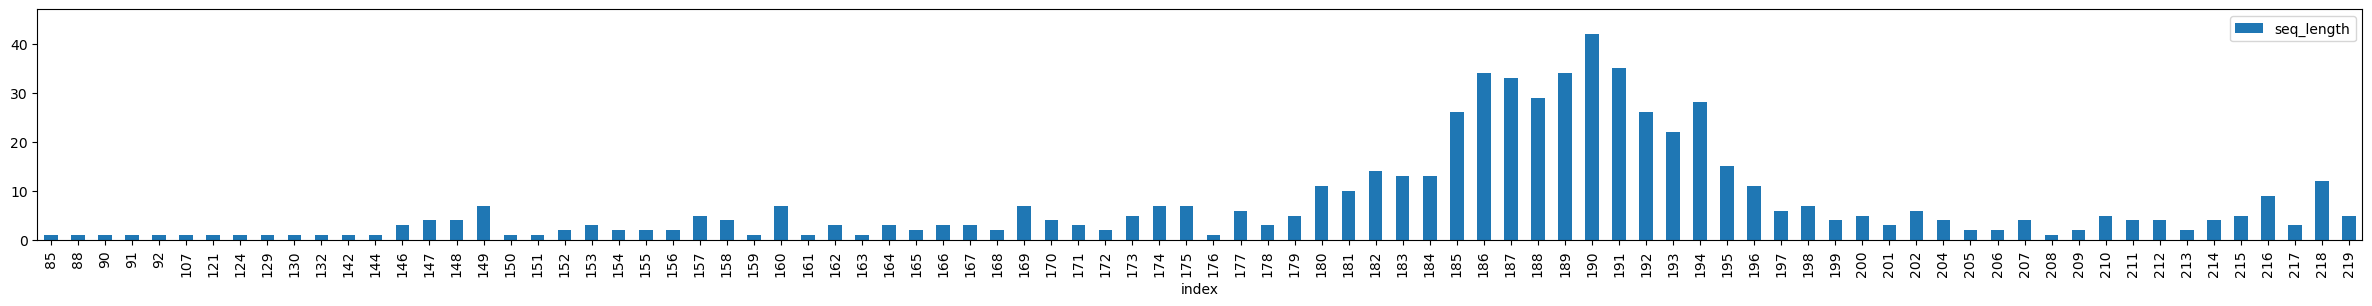

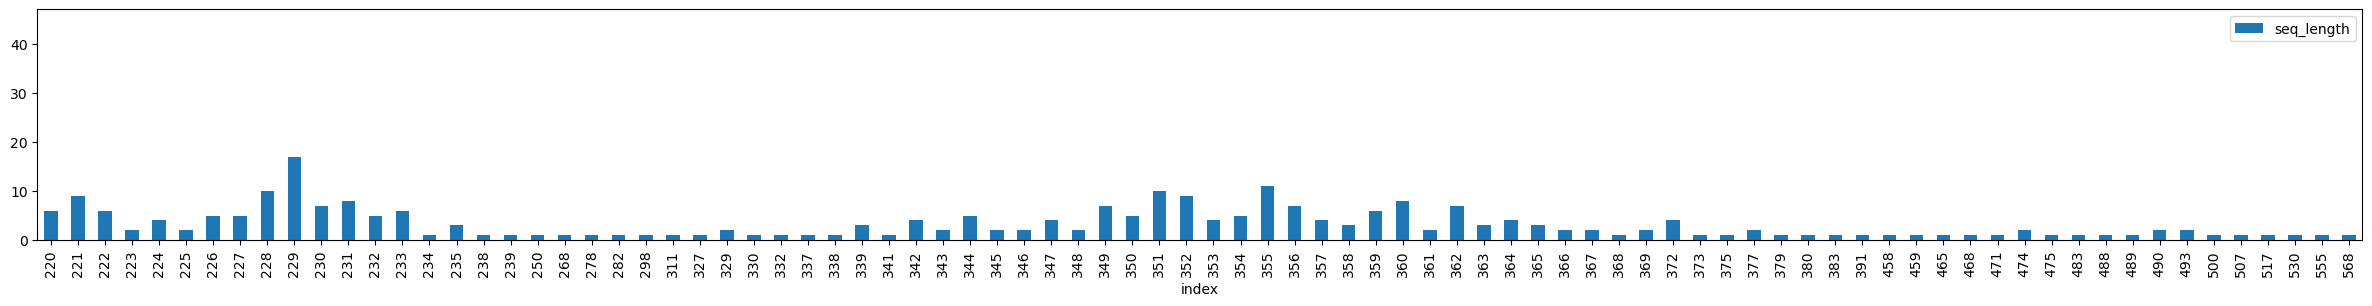

In [12]:
plot_column_value_count_distribution(df_train_cores, 'seq_length')

In [13]:
# drop all sequences with sequence_length > 500:
df_train_cores.drop(df_train_cores.loc[df_train_cores['seq_length'] > 500].index, inplace=True)

In [14]:
df_test_cores['seq_length'] = df_test_cores.apply(lambda row: (len(row['seq'])), axis = 1)
df_test_cores

,seq,label,id,knot_type,knot_start,knot_end,family,seq_length
0,MSRQRSHKGKVTICLVNTYDKLKWHDIHSRNIARAAPLCFYTGFEL...,1.0,A0A7K4BYM6,3_1',102,150,IPR007501,177
1,MALVHYPVVNKHGEIIASAITNLDLHDISRAAKTYGVRSFYVVTPL...,1.0,A0A351CF62,3_1',104,151,IPR019230,188
2,MGLVLEILVKTPLGLEEVCASRIAELDPGAEVVVRPGGYVGLVGVV...,1.0,A0A2H5V2T1,3_1',276,323,IPR025849,359
3,MNRSKVFVALLHYPVLNRNHDIVTSSITSVDLHDIARSCRTYGVET...,1.0,A0A7V6E7Y5,3_1',110,159,IPR019230,187
4,MRKAKVYIALLHYPMYNKRMDIITTSVTNLDLHDIARAARTYDVEK...,1.0,A0A7X6UHL2,3_1',111,159,IPR019230,190
...,...,...,...,...,...,...,...,...
250,MHVGLVHWPVLDRAGNTVCTNITNFDIMDIARVSRSLGIETYTLIN...,1.0,A0A2E3WWS6,3_1',102,152,IPR019230,184
251,MDLVIKTRRGLERAAASVVKELLGPGAEVEAAPHGYLGIVVAKGLG...,1.0,B1Y9Z5,3_1',272,318,IPR025849,364
252,MQTRSHLLDQLQANITKSVRVYHHSYLVLLHRRYHPILKNQSKIFI...,1.0,A0A842WNF3,3_1',120.0,168.0,IPR018665,194
253,MLTLGIVNTYDKIKIHEAHYRSIARAAPIAYAYGFNLMLFDYPFKM...,1.0,A0A822J8D3,3_1',96,144,IPR007501,182


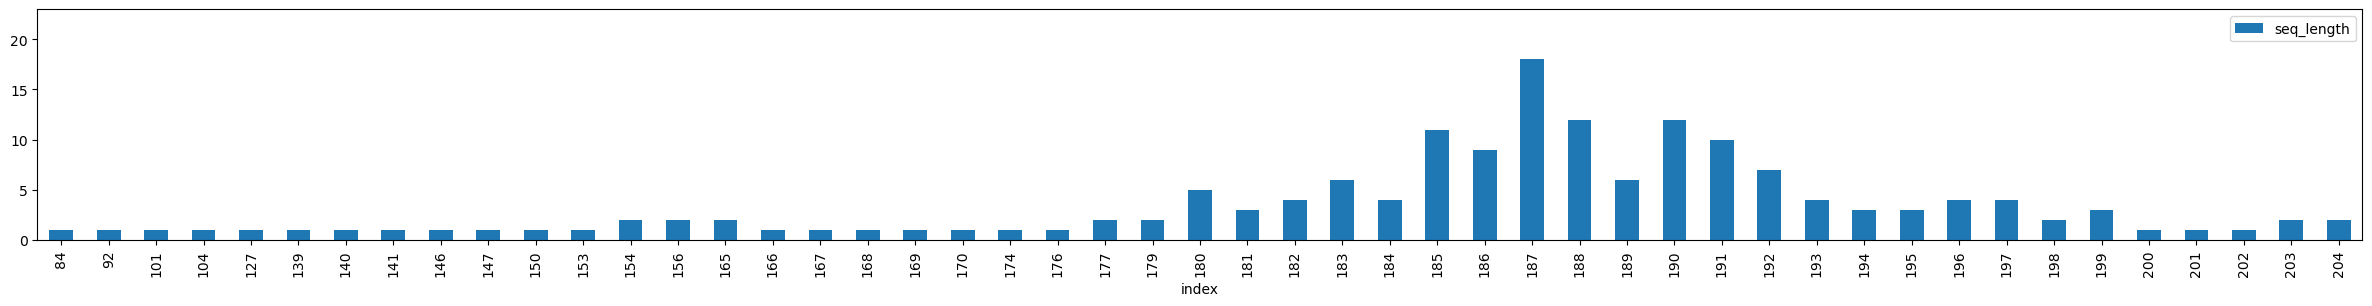

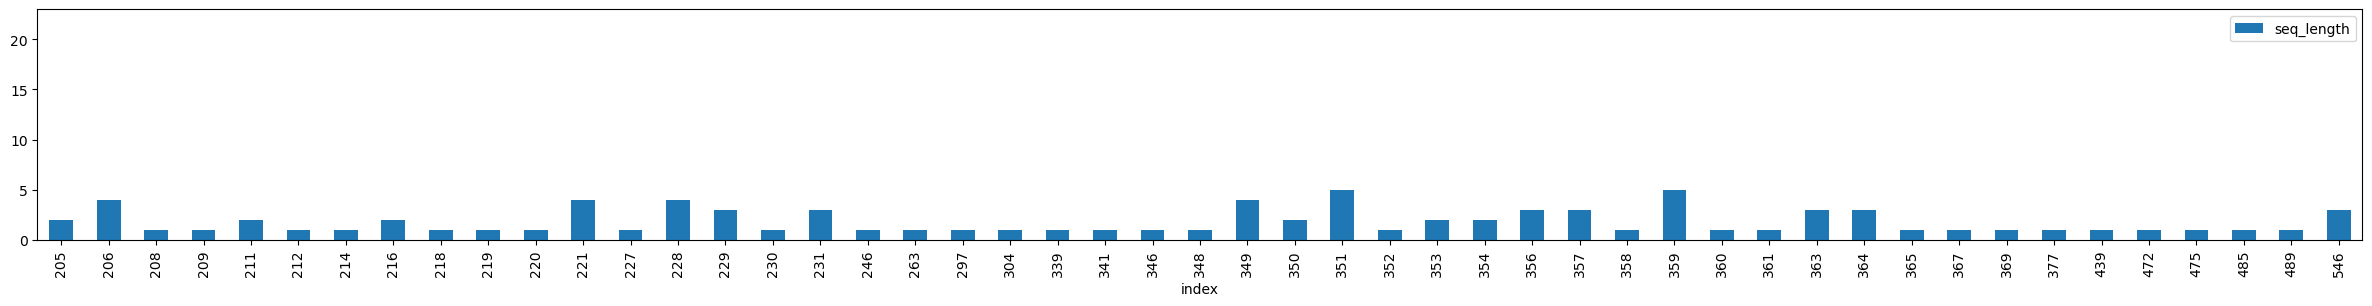

In [15]:
plot_column_value_count_distribution(df_test_cores, 'seq_length')

In [17]:
df_test_cores['seq_length'].mean()

228.6

In [18]:
# drop all sequences with sequence_length > 500:
df_test_cores.drop(df_test_cores.loc[df_test_cores['seq_length'] > 500].index, inplace=True)

### Look at knot core lengths distribution:

In [19]:
df_train_cores['knot_length'] = df_train_cores.apply(lambda row: (int(row['knot_end']) - int(row['knot_start'])), axis = 1)
df_train_cores

,seq,label,id,knot_type,knot_start,knot_end,family,seq_length,knot_length
0,MGELYLALIHAPVYNKNMEQVATSITNLDLHDIARSSSTFGVNKYY...,1.0,A0A101W4C2,3_1',110,158,IPR019230,186,48
1,MLSVGLIHWPCIDKNGEEIATAITNLDLHDLARVCLTYGINTLYIV...,1.0,A0A485M7Z9,3_1',101,147,IPR019230,177,46
2,MSDIRLDVALVHYPVLDAQGQVSGSAVTNLDLHDIARAGRTYGVDT...,1.0,A0A1W9MB48,3_1',111,158,IPR019230,190,47
3,MAEIIVVVYNISSLPRLIEFAKVAYGFGVRRLAVARVFGSAAQQIG...,1.0,A0A0F2L9F6,3_1',77.0,121.0,IPR018665,147,44
4,MSQVYIGLVHYPVLNRKNEVIASAITSIDLHDLGRLACTYDLPTCY...,1.0,A0A7C0WT36,3_1',109,159,IPR019230,191,50
...,...,...,...,...,...,...,...,...,...
893,MSLIVAVIHYPVYNRNGEIVATSITSTEIQDVGRTCMTFNVKLCYI...,1.0,A0A7C4UMT3,3_1',107,156,IPR007501,190,49
894,MQGRCTIGLYNSYDPNRFHEIHRRSITRALPLCVGFDCNLAIFGFP...,1.0,A0A7C4F9A0,3_1',101,148,IPR007501,182,47
895,MSIFKYLQQLLVVSSMSGVDLIIKTRKEFERVAASHIKELLGPGAE...,1.0,A0A124IRC4,3_1',290,336,IPR025849,377,46
896,MTDTGVEVIPLLHNVYSQQRVVEVAKVVYGLGFKVFVVTKAVGSAA...,1.0,A0A7C2Q5Q6,3_1',84.0,128.0,IPR018665,171,44


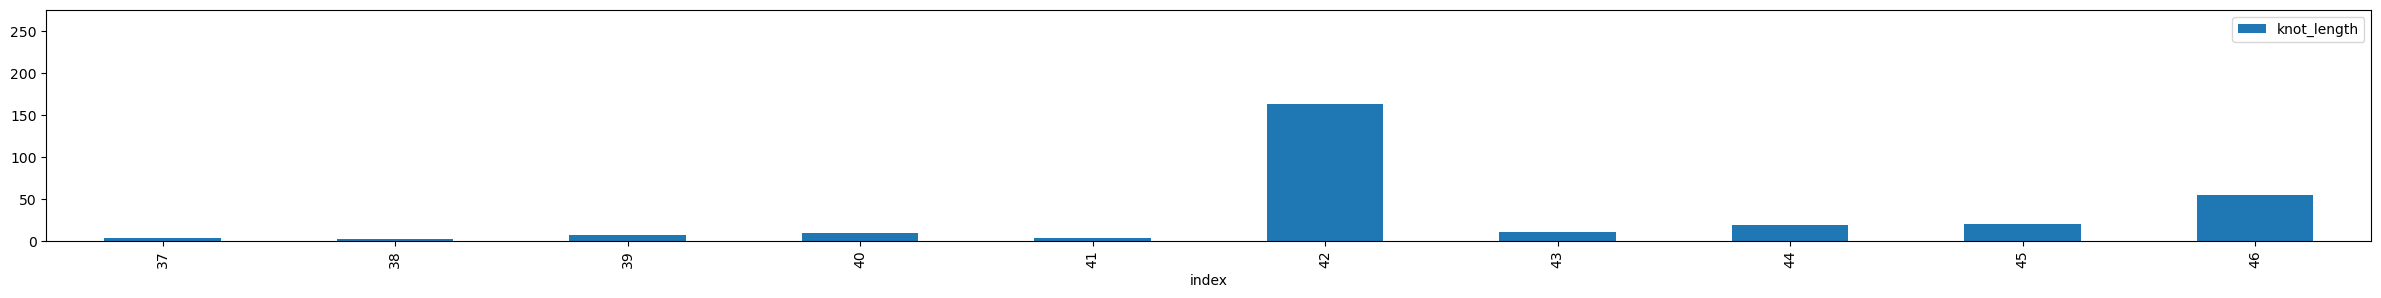

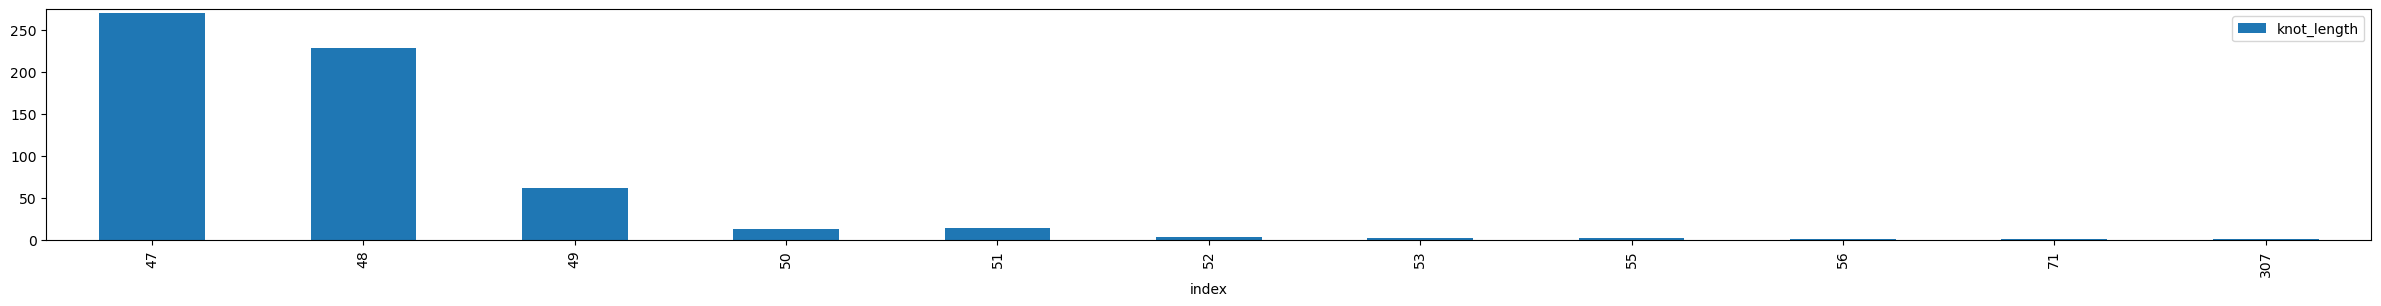

In [20]:
plot_column_value_count_distribution(df_train_cores, 'knot_length')

In [21]:
df_test_cores['knot_length'] = df_test_cores.apply(lambda row: (int(row['knot_end']) - int(row['knot_start'])), axis = 1)
df_test_cores

,seq,label,id,knot_type,knot_start,knot_end,family,seq_length,knot_length
0,MSRQRSHKGKVTICLVNTYDKLKWHDIHSRNIARAAPLCFYTGFEL...,1.0,A0A7K4BYM6,3_1',102,150,IPR007501,177,48
1,MALVHYPVVNKHGEIIASAITNLDLHDISRAAKTYGVRSFYVVTPL...,1.0,A0A351CF62,3_1',104,151,IPR019230,188,47
2,MGLVLEILVKTPLGLEEVCASRIAELDPGAEVVVRPGGYVGLVGVV...,1.0,A0A2H5V2T1,3_1',276,323,IPR025849,359,47
3,MNRSKVFVALLHYPVLNRNHDIVTSSITSVDLHDIARSCRTYGVET...,1.0,A0A7V6E7Y5,3_1',110,159,IPR019230,187,49
4,MRKAKVYIALLHYPMYNKRMDIITTSVTNLDLHDIARAARTYDVEK...,1.0,A0A7X6UHL2,3_1',111,159,IPR019230,190,48
...,...,...,...,...,...,...,...,...,...
250,MHVGLVHWPVLDRAGNTVCTNITNFDIMDIARVSRSLGIETYTLIN...,1.0,A0A2E3WWS6,3_1',102,152,IPR019230,184,50
251,MDLVIKTRRGLERAAASVVKELLGPGAEVEAAPHGYLGIVVAKGLG...,1.0,B1Y9Z5,3_1',272,318,IPR025849,364,46
252,MQTRSHLLDQLQANITKSVRVYHHSYLVLLHRRYHPILKNQSKIFI...,1.0,A0A842WNF3,3_1',120.0,168.0,IPR018665,194,48
253,MLTLGIVNTYDKIKIHEAHYRSIARAAPIAYAYGFNLMLFDYPFKM...,1.0,A0A822J8D3,3_1',96,144,IPR007501,182,48


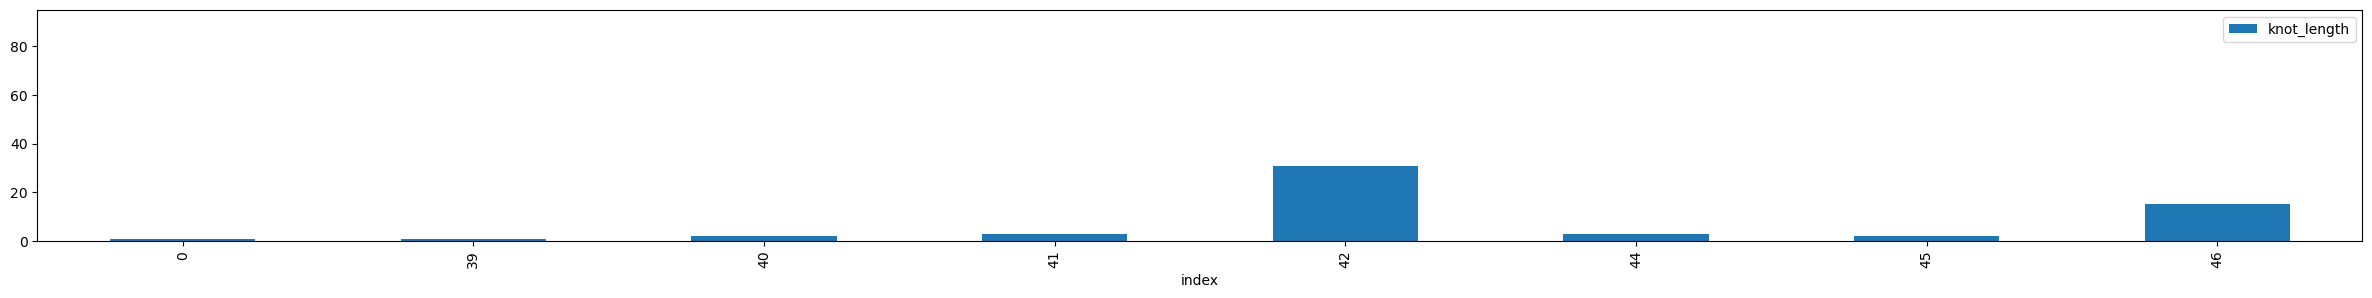

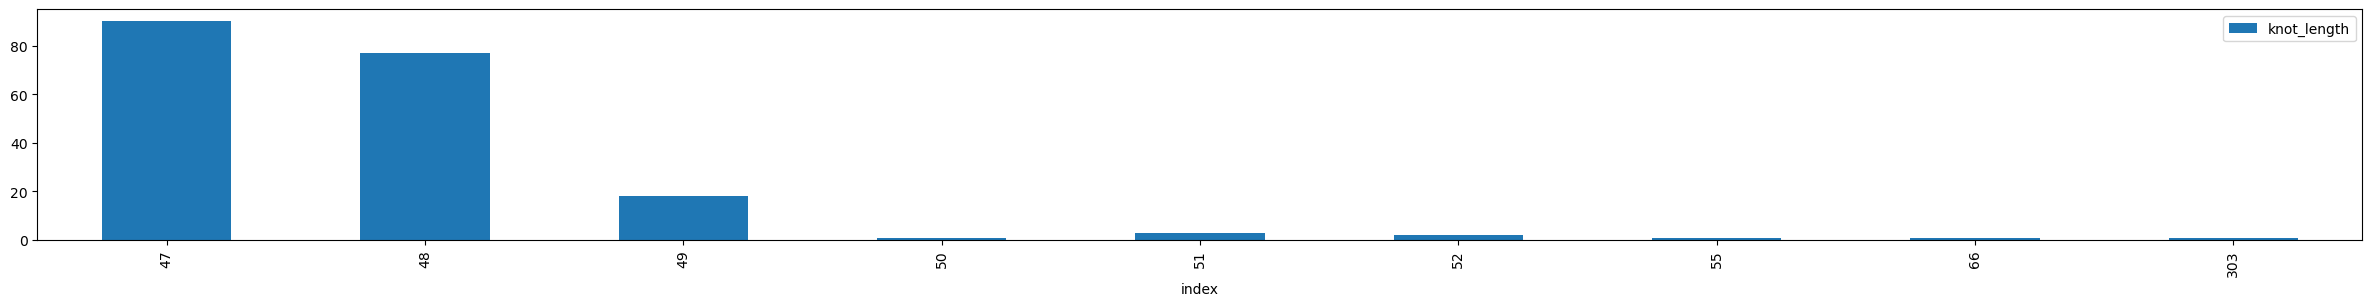

In [22]:
plot_column_value_count_distribution(df_test_cores, 'knot_length')

In [23]:
df_test_cores['knot_length'].mean()

47.59920634920635

#### Calculate average % of knot core with respect to sequence length:

In [24]:
df_train_cores['knot_core_percentage'] = (df_train_cores['knot_length'] * 100) / df_train_cores['seq_length']
df_train_cores

,seq,label,id,knot_type,knot_start,knot_end,family,seq_length,knot_length,knot_core_percentage
0,MGELYLALIHAPVYNKNMEQVATSITNLDLHDIARSSSTFGVNKYY...,1.0,A0A101W4C2,3_1',110,158,IPR019230,186,48,25.806452
1,MLSVGLIHWPCIDKNGEEIATAITNLDLHDLARVCLTYGINTLYIV...,1.0,A0A485M7Z9,3_1',101,147,IPR019230,177,46,25.988701
2,MSDIRLDVALVHYPVLDAQGQVSGSAVTNLDLHDIARAGRTYGVDT...,1.0,A0A1W9MB48,3_1',111,158,IPR019230,190,47,24.736842
3,MAEIIVVVYNISSLPRLIEFAKVAYGFGVRRLAVARVFGSAAQQIG...,1.0,A0A0F2L9F6,3_1',77.0,121.0,IPR018665,147,44,29.931973
4,MSQVYIGLVHYPVLNRKNEVIASAITSIDLHDLGRLACTYDLPTCY...,1.0,A0A7C0WT36,3_1',109,159,IPR019230,191,50,26.178010
...,...,...,...,...,...,...,...,...,...,...
893,MSLIVAVIHYPVYNRNGEIVATSITSTEIQDVGRTCMTFNVKLCYI...,1.0,A0A7C4UMT3,3_1',107,156,IPR007501,190,49,25.789474
894,MQGRCTIGLYNSYDPNRFHEIHRRSITRALPLCVGFDCNLAIFGFP...,1.0,A0A7C4F9A0,3_1',101,148,IPR007501,182,47,25.824176
895,MSIFKYLQQLLVVSSMSGVDLIIKTRKEFERVAASHIKELLGPGAE...,1.0,A0A124IRC4,3_1',290,336,IPR025849,377,46,12.201592
896,MTDTGVEVIPLLHNVYSQQRVVEVAKVVYGLGFKVFVVTKAVGSAA...,1.0,A0A7C2Q5Q6,3_1',84.0,128.0,IPR018665,171,44,25.730994


In [25]:
print(f'Mean:   {df_train_cores["knot_core_percentage"].mean()}')
print(f'Median: {df_train_cores["knot_core_percentage"].median()}')
print(f'Max:    {df_train_cores["knot_core_percentage"].max()}')
print(f'Min:    {df_train_cores["knot_core_percentage"].min()}')

Mean:   22.43920967931993
Median: 24.615384615384617
Max:    81.00263852242745
Min:    8.074534161490684


In [26]:
df_test_cores['knot_core_percentage'] = (df_test_cores['knot_length'] * 100) / df_test_cores['seq_length']
df_test_cores

,seq,label,id,knot_type,knot_start,knot_end,family,seq_length,knot_length,knot_core_percentage
0,MSRQRSHKGKVTICLVNTYDKLKWHDIHSRNIARAAPLCFYTGFEL...,1.0,A0A7K4BYM6,3_1',102,150,IPR007501,177,48,27.118644
1,MALVHYPVVNKHGEIIASAITNLDLHDISRAAKTYGVRSFYVVTPL...,1.0,A0A351CF62,3_1',104,151,IPR019230,188,47,25.000000
2,MGLVLEILVKTPLGLEEVCASRIAELDPGAEVVVRPGGYVGLVGVV...,1.0,A0A2H5V2T1,3_1',276,323,IPR025849,359,47,13.091922
3,MNRSKVFVALLHYPVLNRNHDIVTSSITSVDLHDIARSCRTYGVET...,1.0,A0A7V6E7Y5,3_1',110,159,IPR019230,187,49,26.203209
4,MRKAKVYIALLHYPMYNKRMDIITTSVTNLDLHDIARAARTYDVEK...,1.0,A0A7X6UHL2,3_1',111,159,IPR019230,190,48,25.263158
...,...,...,...,...,...,...,...,...,...,...
250,MHVGLVHWPVLDRAGNTVCTNITNFDIMDIARVSRSLGIETYTLIN...,1.0,A0A2E3WWS6,3_1',102,152,IPR019230,184,50,27.173913
251,MDLVIKTRRGLERAAASVVKELLGPGAEVEAAPHGYLGIVVAKGLG...,1.0,B1Y9Z5,3_1',272,318,IPR025849,364,46,12.637363
252,MQTRSHLLDQLQANITKSVRVYHHSYLVLLHRRYHPILKNQSKIFI...,1.0,A0A842WNF3,3_1',120.0,168.0,IPR018665,194,48,24.742268
253,MLTLGIVNTYDKIKIHEAHYRSIARAAPIAYAYGFNLMLFDYPFKM...,1.0,A0A822J8D3,3_1',96,144,IPR007501,182,48,26.373626


In [27]:
print(f'Mean:   {df_test_cores["knot_core_percentage"].mean()}')
print(f'Median: {df_test_cores["knot_core_percentage"].median()}')
print(f'Max:    {df_test_cores["knot_core_percentage"].max()}')
print(f'Min:    {df_test_cores["knot_core_percentage"].min()}')

Mean:   22.814717774326155
Median: 24.870466321243523
Max:    85.11235955056179
Min:    0.0


In [28]:
# df_test_cores.loc[df_test_cores['knot_core_percentage'] > 99]

In [29]:
# # drop all sequences with knot core lengths greater than sequence lengths:
# df_test_cores.drop(df_test_cores.loc[df_test_cores['knot_core_percentage'] > 100].index, inplace=True)
# df_test_cores

## Save the cleaned data to a CSV file:

In [27]:
df_reduced_train = df_train_cores[['seq', 'knot_start', 'knot_end', 'knot_length', 'family']].copy()
df_reduced_train = df_reduced_train.sample(frac=1, random_state=42).reset_index(drop=True)
df_reduced_train

,seq,knot_start,knot_end,knot_length,family
0,MANLYVALLHFPMRDRQGRVVATALTPIDVPDIARTARTYGAKRYY...,106,153,47,IPR019230
1,MAKVYIALLHYPVYNKKKKVITTCITGFDLHDIARSALTYGITRYY...,104,150,46,IPR019230
2,MSPERFARINQMLDNRQVDLTVCLDKVHMTNNIAAVLRSADCVGIH...,95,137,42,IPR022724
3,MATLTLALYNTYDTKRLHEAHLRAIARAAPIAYAYGFHLALVGFPL...,98,146,48,IPR007501
4,MRNKVYLSLVHYPVYNRNKDIVCTSVTNFDIHDISRSCGTYEIKGY...,110,157,47,IPR019230
...,...,...,...,...,...
888,MLDKVYVALIHYPILKKDGTIVSTAVTNFDVHDISRSCKTYNIKKY...,110,158,48,IPR019230
889,MTPPVNLVLINPKKSPDISEDNRRLISRIAPVCLAYNFHLWLIDFG...,94,145,51,IPR007501
890,MVEVFVVLNNVSSPQRLLDTAKVTYSANMSFVKGFIAVKVTGMAAQ...,83.0,126.0,43,IPR018665
891,MKAIEADVYLGLVHNPIYNKLGEVITTTVTNYDLHDISRAAKTYEI...,113,161,48,IPR019230


In [28]:
df_reduced_train.to_csv('/home/jovyan/data/proteins/cores_spout_train.csv', index=False)

In [29]:
df_reduced_test = df_test_cores[['seq', 'knot_start', 'knot_end', 'knot_length', 'family']].copy()
df_reduced_test = df_reduced_test.sample(frac=1, random_state=42).reset_index(drop=True)
df_reduced_test

,seq,knot_start,knot_end,knot_length,family
0,MEIIDQWAGIGIIRGEEISKKKIGKRDSREITNKISLVQLIYEAED...,134,181,47,IPR025849
1,VPDLGEVAEQIKQDSGREPLWIATSARRYPNTLSFSNLTKIISEDA...,21,70,49,IPR019230
2,MALIHFPVMNKKDMPIGSALTTIDLHDIARASITFGVKGFYVVTPY...,104,150,46,IPR019230
3,MRKSKVYIALLHYPMYNKRMDVITTSVTNLDLHDIARTARTYNVEG...,111,159,48,IPR019230
4,MRESVYISLVHHPVYDRRKRVVTTSITNLDLHDLSRLARTFGLGGF...,110,157,47,IPR019230
...,...,...,...,...,...
247,MRRYWVEGPGLSYNQERAEGLKRLSVVGSVEELLKNLSSAVMPLIV...,47,93,46,IPR019230
248,MADNKKNDIHLALIHYPVFNKIGEIVTSSVTTLDVHDISRAARTYA...,114,161,47,IPR019230
249,MGEGKKFIVKTQRGMESVAANYISEVLPDANVWASPMGYSGLIIVE...,272,319,47,IPR025849
250,MTPERLQRLRTVLDRRQPDLTVLLEQVHKPHNFSAILRTCDAVGVL...,116,158,42,IPR022724


In [30]:
df_reduced_test.to_csv('/home/jovyan/data/proteins/cores_spout_test.csv', index=False)